# outliers

# How outliers induces in data

# impact of outliers

# How to detect Outlier

# How to handle Outliers

# 1.Z-Score

In [11]:
import numpy as np
array1 = np.array([1,2,3,4,5,6,6,7,8,500])
array1

array([  1,   2,   3,   4,   5,   6,   6,   7,   8, 500])

In [14]:
mean = np.mean(array1)
std = np.std(array1)
threshold = 2 
#we taken threshold 2 here but genrally we mark upto 3
outliers = []
for x_value in array1:
    z_score  = (x_value - mean) / std
    if z_score > threshold:
        outliers.append(x_value)
print("Outliers in array is:",outliers)
    

Outliers in array is: [500]


# 2.IQR

In [34]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)
IQR = q3-q1

upper_limit = q1-1.5*IQR
lower_limit = q3 + 1.5*IQR

In [28]:
outlier = df[(df["SepalWidthCm"]>upper_limit) | (df["SepalWidthCm"]<lower_limit)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### in case if we want to drop obs

In [30]:
outlier_indices = df[(df["SepalWidthCm"]>upper_limit) | (df["SepalWidthCm"]<lower_limit)].index
outlier_indices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=150)

In [32]:
# df = df.drop(outlier_indices,axis = 0)
# df

# 3.BOXPLOT

<AxesSubplot: >

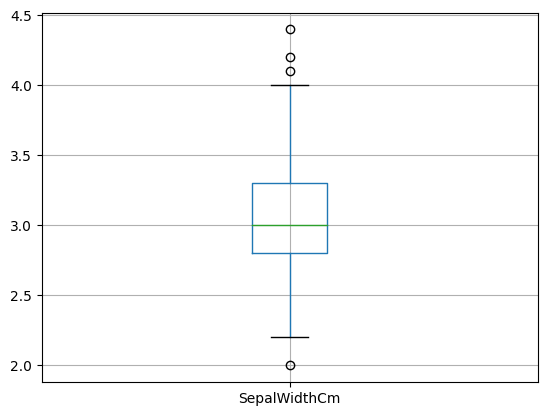

In [35]:
df[["SepalWidthCm"]].boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SepalWidthCm'>

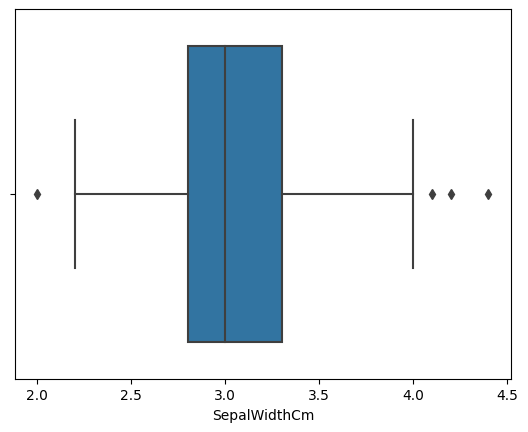

In [36]:
import seaborn as sns
sns.boxplot(df["SepalWidthCm"])

# 4.Scatterplot

<AxesSubplot: >

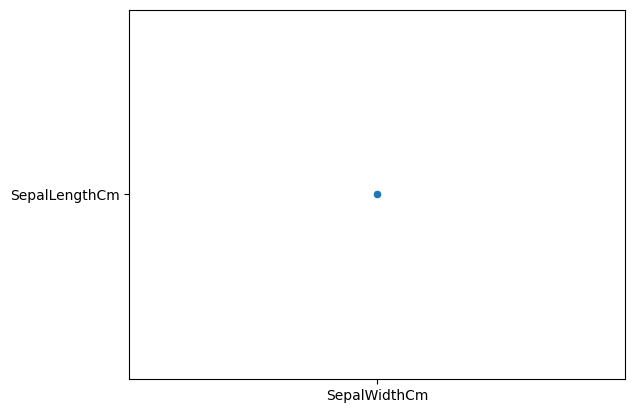

In [41]:
sns.scatterplot(x=["SepalWidthCm"],y = ["SepalLengthCm"])